In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from time import strftime

%matplotlib inline

In [138]:
df = pd.read_csv('Data.csv')

In [139]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [140]:
df.shape

(110527, 14)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [142]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [143]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [144]:
df['sch_weekday'] = df['ScheduledDay'].dt.dayofweek
df['app_weekday'] = df['AppointmentDay'].dt.dayofweek

In [145]:
df['sch_weekday'].value_counts()

1    26168
2    24262
0    23085
4    18915
3    18073
5       24
Name: sch_weekday, dtype: int64

In [146]:
df['app_weekday'].value_counts()

2    25867
1    25640
0    22715
4    19019
3    17247
5       39
Name: app_weekday, dtype: int64

In [147]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'sch_weekday', 'app_weekday'],
      dtype='object')

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
 14  sch_weekday     110527 non-null  int

In [149]:
df.drop(['PatientId', 'AppointmentID', 'Neighbourhood'], axis = 1, inplace = True)

In [150]:
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Scholarship',
       'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received',
       'No-show', 'sch_weekday', 'app_weekday'],
      dtype='object')

In [151]:
df.head(5)

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,sch_weekday,app_weekday
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No,4,4
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No,4,4
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No,4,4
3,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No,4,4
4,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No,4,4


In [152]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,sch_weekday,app_weekday
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,1.851955,1.858243
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,1.378520,1.371672
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,5.000000


Text(0.5, 1.0, 'Count of target variable per category')

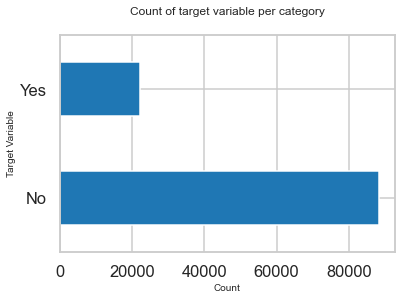

In [153]:
df['No-show'].value_counts().plot(kind = 'barh')
plt.xlabel('Count')
plt.ylabel("Target Variable")
plt.title ("Count of target variable per category")

In [154]:
df["No-show"].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [155]:
100*df["No-show"].value_counts()/len(df["No-show"])

No     79.806744
Yes    20.193256
Name: No-show, dtype: float64

In [156]:
df.isnull().sum()

Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
sch_weekday       0
app_weekday       0
dtype: int64

C:\Users\Shweta Mourya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


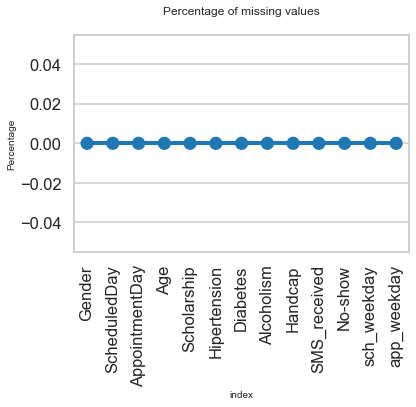

In [157]:
missing = pd.DataFrame(df.isnull().sum()*100/df.shape[0]).reset_index()
plt.figure
ax = sns.pointplot('index',0,data = missing)
plt.xticks(rotation = 90)
plt.title("Percentage of missing values")
plt.ylabel("Percentage")
plt.show()

In [158]:
 new_data = df.copy()


In [159]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Scholarship     110527 non-null  int64         
 5   Hipertension    110527 non-null  int64         
 6   Diabetes        110527 non-null  int64         
 7   Alcoholism      110527 non-null  int64         
 8   Handcap         110527 non-null  int64         
 9   SMS_received    110527 non-null  int64         
 10  No-show         110527 non-null  object        
 11  sch_weekday     110527 non-null  int64         
 12  app_weekday     110527 non-null  int64         
dtypes: datetime64[ns](2), int64(9), object(2)
memory usage: 11.0+ MB


In [160]:
print(df['Age'].max()) 

115


In [161]:
labels = ["{0} - {1}".format(i, i + 20) for i in range(1, 118, 20)]
df['Age_group'] = pd.cut(df.Age, range(1, 130, 20), right=False, labels=labels)


In [162]:
df.drop(['Age'], axis=1, inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,sch_weekday,app_weekday,Age_group
0,F,2016-04-29,2016-04-29,0,1,0,0,0,0,No,4,4,61 - 81
1,M,2016-04-29,2016-04-29,0,0,0,0,0,0,No,4,4,41 - 61
2,F,2016-04-29,2016-04-29,0,0,0,0,0,0,No,4,4,61 - 81
3,F,2016-04-29,2016-04-29,0,0,0,0,0,0,No,4,4,1 - 21
4,F,2016-04-29,2016-04-29,0,1,1,0,0,0,No,4,4,41 - 61


In [163]:
list(df.columns)

['Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Scholarship',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received',
 'No-show',
 'sch_weekday',
 'app_weekday',
 'Age_group']

---------- Gender ----------
F    71840
M    38687
Name: Gender, dtype: int64
---------- ScheduledDay ----------
2016-05-03    4238
2016-05-02    4216
2016-05-16    4120
2016-05-05    4095
2016-05-10    4024
              ... 
2016-04-16       1
2016-01-28       1
2015-11-10       1
2016-03-19       1
2016-03-05       1
Name: ScheduledDay, Length: 111, dtype: int64
---------- AppointmentDay ----------
2016-06-06    4692
2016-05-16    4613
2016-05-09    4520
2016-05-30    4514
2016-06-08    4479
2016-05-11    4474
2016-06-01    4464
2016-06-07    4416
2016-05-12    4394
2016-05-02    4376
2016-05-18    4373
2016-05-17    4372
2016-06-02    4310
2016-05-10    4308
2016-05-31    4279
2016-05-05    4273
2016-05-19    4270
2016-05-03    4256
2016-05-04    4168
2016-06-03    4090
2016-05-24    4009
2016-05-13    3987
2016-05-25    3909
2016-05-06    3879
2016-05-20    3828
2016-04-29    3235
2016-05-14      39
Name: AppointmentDay, dtype: int64
---------- Scholarship ----------
0    99666
1 

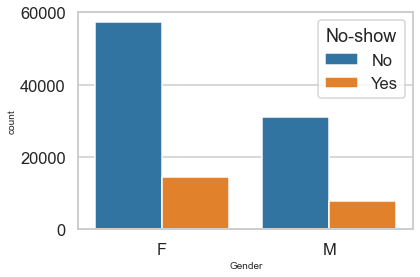

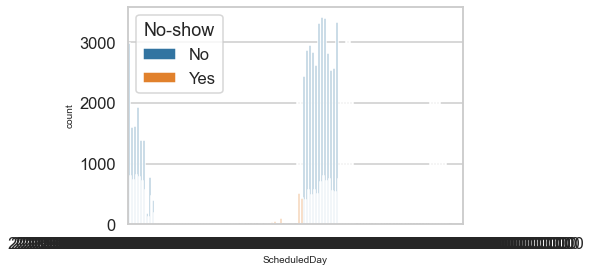

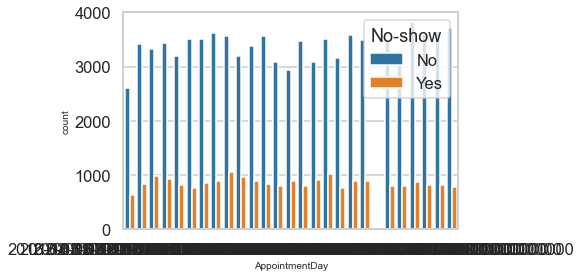

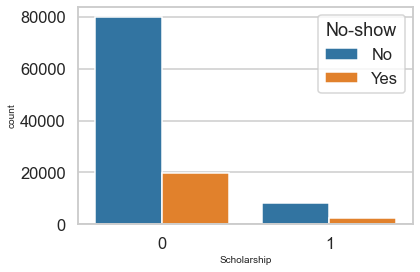

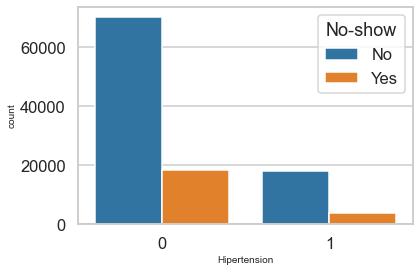

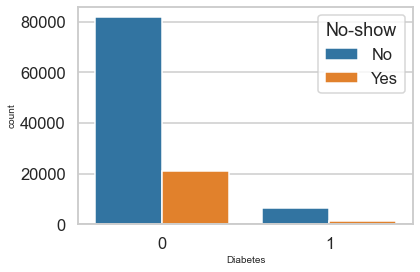

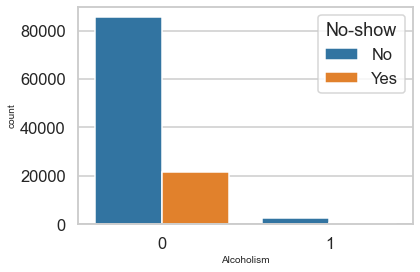

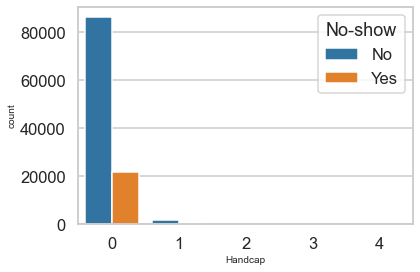

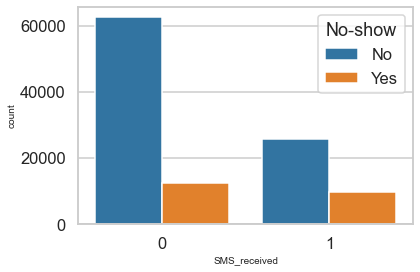

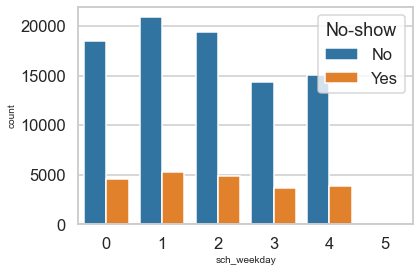

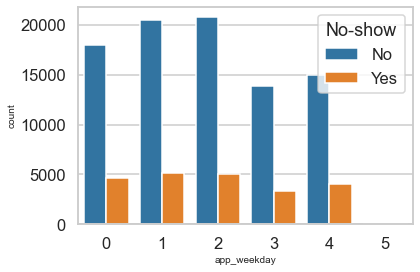

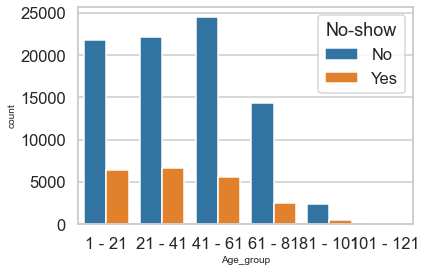

In [164]:
for i, predictor in enumerate(df.drop(columns=['No-show'])):
    print('-'*10,predictor,'-'*10)
    print(df[predictor].value_counts())    
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='No-show')

In [165]:
df.rename(columns = {'No-show':'NoShow', 'Hipertension':'Hypertension'},inplace = True)
df.head(5)

,Gender,ScheduledDay,AppointmentDay,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow,sch_weekday,app_weekday,Age_group
0,F,2016-04-29,2016-04-29,0,1,0,0,0,0,No,4,4,61 - 81
1,M,2016-04-29,2016-04-29,0,0,0,0,0,0,No,4,4,41 - 61
2,F,2016-04-29,2016-04-29,0,0,0,0,0,0,No,4,4,61 - 81
3,F,2016-04-29,2016-04-29,0,0,0,0,0,0,No,4,4,1 - 21
4,F,2016-04-29,2016-04-29,0,1,1,0,0,0,No,4,4,41 - 61


In [166]:
df['NoShow'] = np.where(df.NoShow == 'Yes',1,0)
df.NoShow.value_counts()

0    88208
1    22319
Name: NoShow, dtype: int64

In [167]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,ScheduledDay,AppointmentDay,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow,sch_weekday,app_weekday,Gender_F,Gender_M,Age_group_1 - 21,Age_group_21 - 41,Age_group_41 - 61,Age_group_61 - 81,Age_group_81 - 101,Age_group_101 - 121
0,2016-04-29,2016-04-29,0,1,0,0,0,0,0,4,4,1,0,0,0,0,1,0,0
1,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,0,1,0,0,1,0,0,0
2,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,1,0,0,0,0,1,0,0
3,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,1,0,1,0,0,0,0,0
4,2016-04-29,2016-04-29,0,1,1,0,0,0,0,4,4,1,0,0,0,1,0,0,0


<AxesSubplot:>

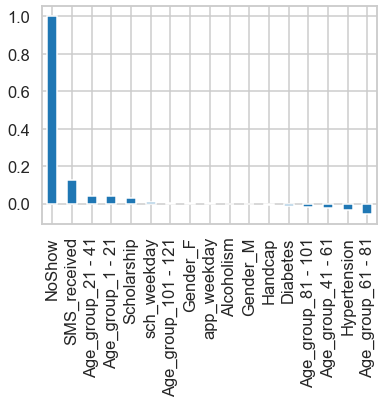

In [168]:
plt.figure()
df_dummies.corr()['NoShow'].sort_values(ascending = False).plot(kind='bar')

<AxesSubplot:>

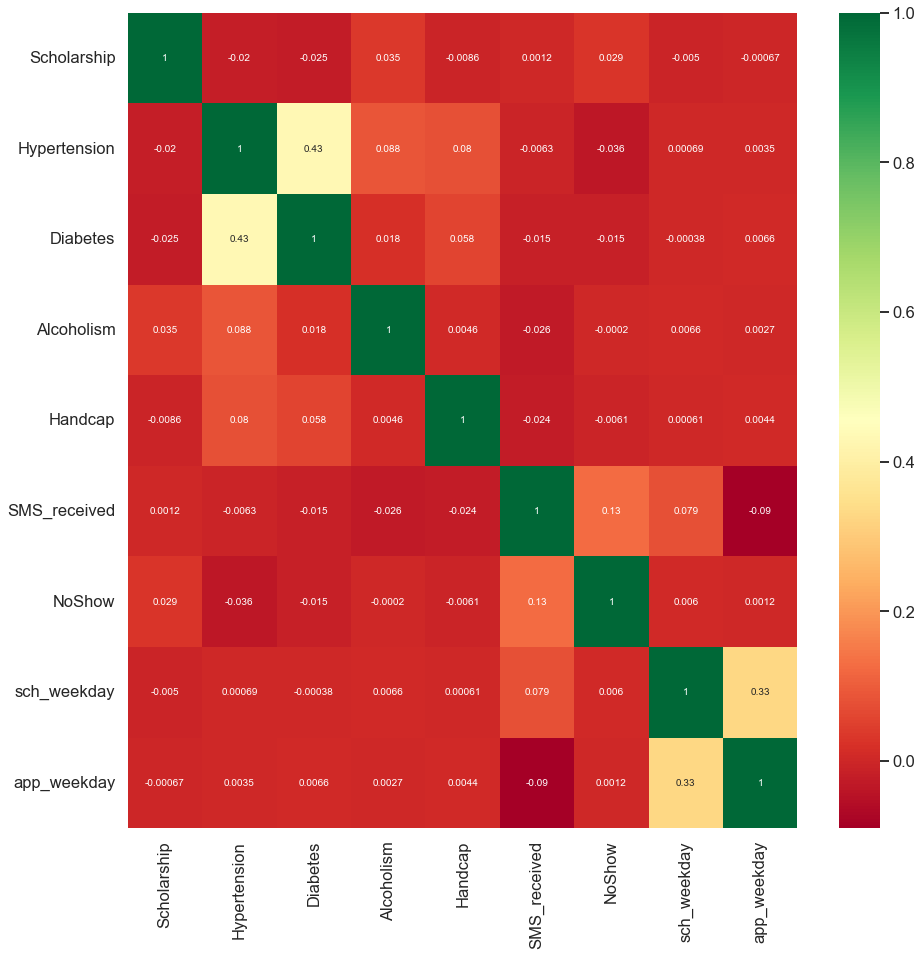

In [169]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
sns.heatmap(df_dummies[top_corr_features].corr(), annot = True, cmap="RdYlGn")

In [170]:
new_df1_target0= df.loc[df["NoShow"]==0]
new_df1_target1= df.loc[df["NoShow"]==1]

In [171]:
def uniplot(df,col,title,hue = None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 10
    plt.rcParams['axes.titlesize'] = 12
    plt.rcParams['axes.titlepad'] = 20
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

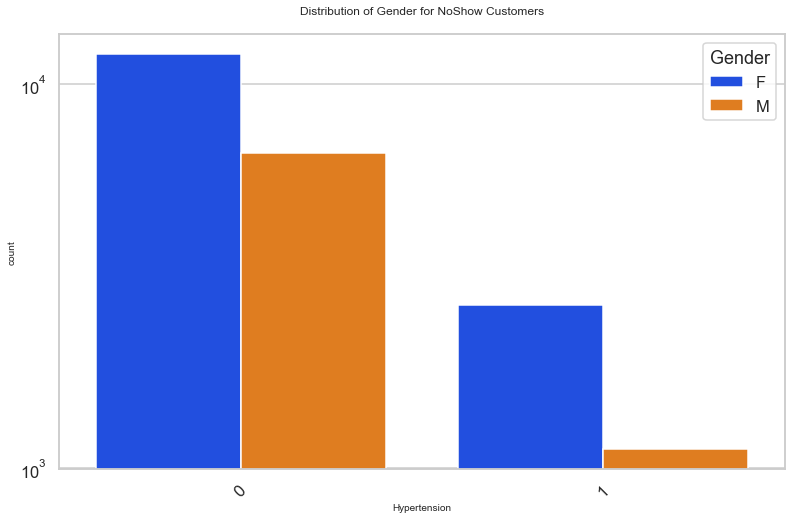

In [172]:
uniplot(new_df1_target1,col='Hypertension',title='Distribution of Gender for NoShow Customers',hue='Gender')

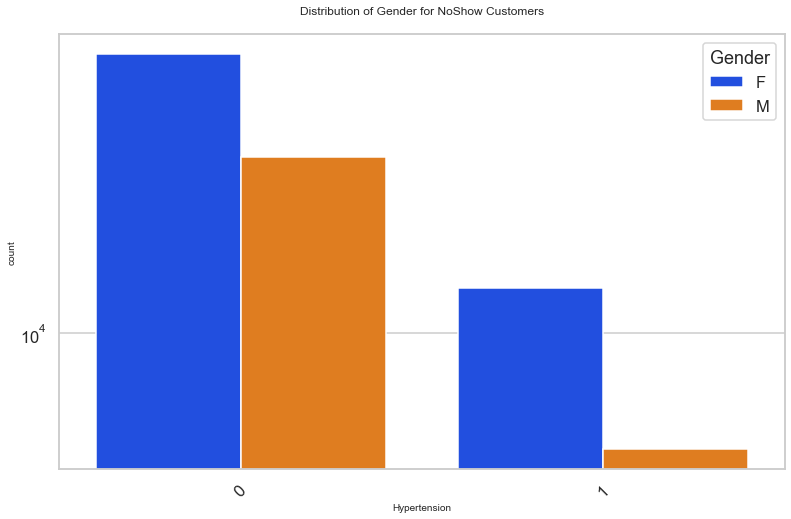

In [173]:
uniplot(new_df1_target0,col='Hypertension',title='Distribution of Gender for NoShow Customers',hue='Gender')

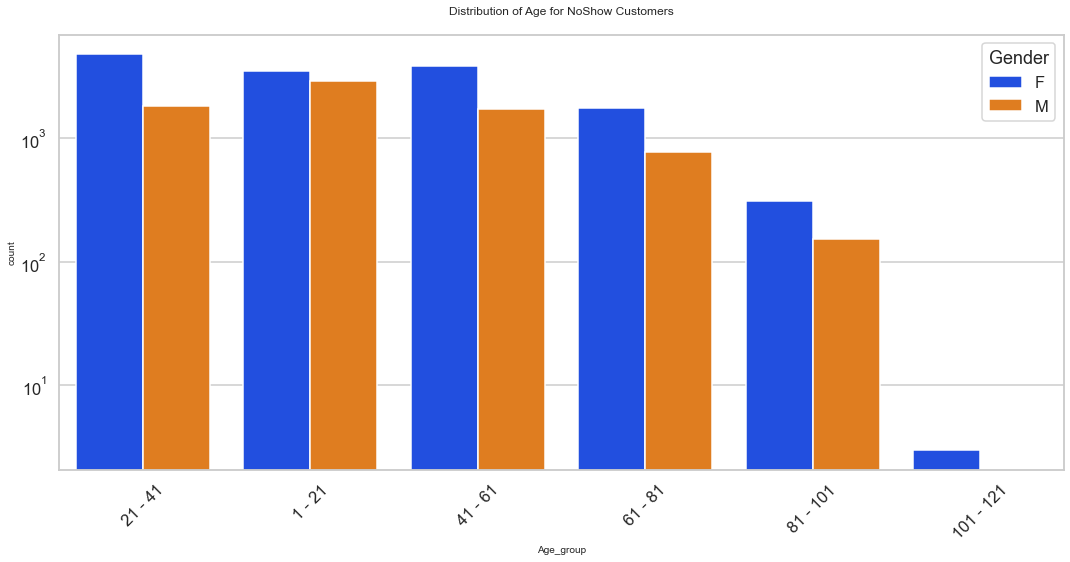

In [174]:
uniplot(new_df1_target1,col='Age_group',title='Distribution of Age for NoShow Customers',hue='Gender')

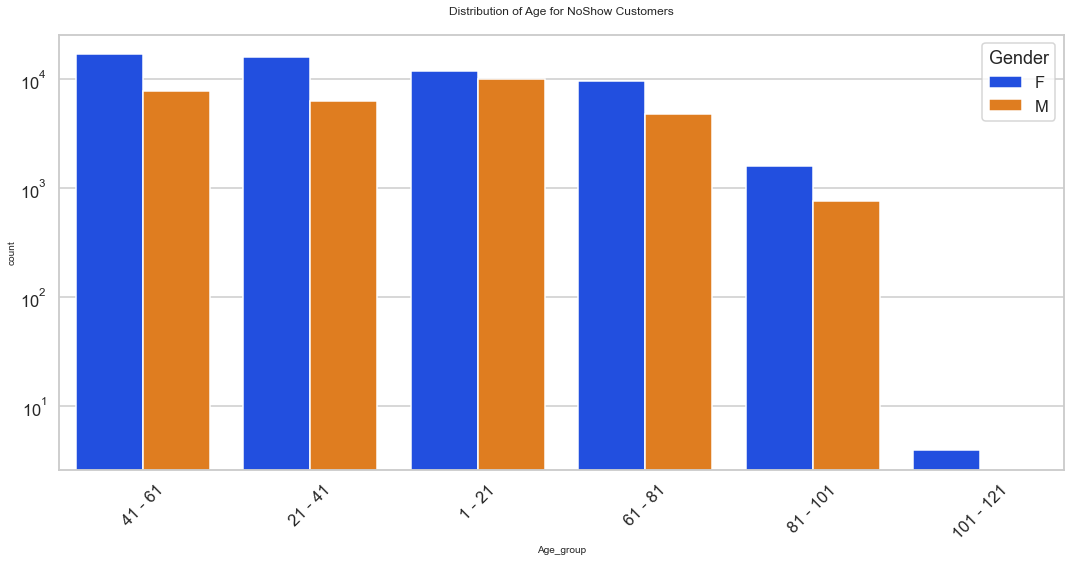

In [175]:
uniplot(new_df1_target0,col='Age_group',title='Distribution of Age for NoShow Customers',hue='Gender')